# Limpieza de bienes raíces

Este es un conjunto de datos (dataset) reales que fue descargado usando técnicas de web scraping. La data contiene registros de **Fotocasa**, el cual es uno de los sitios más populares de bienes raíces en España. Por favor no hagas esto (web scraping) a no ser que sea para propósitos académicos.

El dataset fue descargado hace algunos años por Henry Navarro y en ningún caso se obtuvo beneficio económico de ello.

Contiene miles de datos de casas reales publicadas en la web www.fotocasa.com. Tu objetivo es extraer tanta información como sea posible con el conocimiento que tienes hasta ahora de ciencia de datos, por ejemplo ¿cuál es la casa más cara en todo el dataset?

Empecemos precisamente con esa pregunta... ¡Buena suerte!

#### Ejercicio 00. Lee el dataset assets/real_estate.csv e intenta visualizar la tabla (★☆☆)

In [428]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


pd.options.display.max_columns=50
ds = pd.read_csv('assets/real_estate.csv', sep=';')


In [429]:
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,description,address,country,level1,level2,level3,level4,level5,level6,level7,level8,upperLevel,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,2019-12-28T18:27:15.9975027Z,Ponemos a la venta piso de 3 dormitorios con t...,"Calle Presidente Felipe Gonzalez, Arganda del Rey",España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Arganda del Rey, Zona de",Arganda del Rey,NaN,Perlita,NaN,Perlita,0,0,0,0,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,2019-12-28T18:27:15.9975027Z,"""""Agencia inmobiliaria de FUENLABRADA - zona F...","Calle Polvoranca, 6, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,2019-12-28T18:27:15.9975027Z,"Lookandfind Boadilla, vende en exclusiva, piso...","Calle Reyes Católicos, Boadilla del Monte",España,Madrid,Madrid,Zona Noroeste,"Boadilla del Monte, Zona de",Boadilla del Monte,NaN,Sector B,NaN,Sector B,0,0,0,0,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,2019-12-28T18:27:15.9975027Z,Agencia inmobiliaria de FUENLABRADA - zona Fue...,"Barrio San Andres, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,2019-12-28T18:27:15.9975027Z,PISOS DE OBRA NUEVA DE 2 Y 3 DORMITORIOS. OBRA...,Arganda del Rey,España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Arganda del Rey, Zona de",Arganda del Rey,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,2019-12-17T18:19:00Z,¡¡¡IDEAL PROFESIONALES E INVERSORES¡¡¡ \nINFOC...,Madrid Capital,España,Madrid,Madrid,"Madrid, Zona de",NaN,Madrid Capital,NaN,Tetuán,Berruguete,Berruguete,0,0,0,0,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,2019-12-17T18:19:00Z,"Planta baja con cocinas, una de ellos posibili...",Velilla de San Antonio,España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Velilla de San Antonio, Zona de",Velilla de San Antonio,NaN,NaN,NaN,Velilla de San Antonio,0,0,0,0,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,2019-12-17T18:19:00Z,NaN,Torrelodones,España,Madrid,Madrid,Zona Noroeste,"Torrelodones, Zona de",Torrelodones,NaN,Casco Antiguo,NaN,Casco Antiguo,0,0,0,0,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,2019-12-17T18:18:00Z,"Piso de 3 dormitorios con armarios empotrados,...",Velilla de San Antonio,España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Velilla de San Antonio, Zona de",Velill

#### Ejercicio 01. ¿Cuál es la casa más cara en todo el dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle del Prado, Nº20 es la más cara y su precio es de 5000000 USD`

In [430]:

maxPrice=ds["price"].idxmax()
houseExpensive=ds.loc[maxPrice]

print("La casa con dirección ",houseExpensive.address,"es la más cara y su precio es de",houseExpensive.price,"USD")

La casa con dirección  El Escorial es la más cara y su precio es de 8500000 USD


#### Ejercicio 02. ¿Cuál es la casa más barata del dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle Alcalá, Nº58 es la más barata y su precio es de 12000 USD`

In [431]:

dsfiltered=ds[ds["price"] != 0] 
minPrice=dsfiltered["price"].idxmin()
houseCheaper=ds.loc[minPrice]

print("La casa con dirección",houseCheaper.address,"es la más barata y su precio es de",houseCheaper.price,"USD")


La casa con dirección Berlin, Coslada es la más barata y su precio es de 600 USD


#### Ejercicio 03. ¿Cuál es la casa más grande y la más pequeña del dataset? (★☆☆)

Imprime la dirección y el área de las casas seleccionadas. Por ejemplo:

`La casa más grande está ubicada en Calle Gran Vía, Nº38 y su superficie es de 5000 metros`

`La casa más pequeña está ubicada en Calle Mayor, Nº12 y su superficie es de 200 metros`

In [432]:

idMaxSurface=ds["surface"].idxmax()
idMinSurface=ds["surface"].idxmin()

biggestHouse=ds.loc[idMaxSurface]
smallestHouse=ds.loc[idMinSurface]

""""direccion = houseCheaper['address']"""

print("La casa más grande está ubicada en",biggestHouse.address,"y tiene un total de",biggestHouse.surface,"metros")
print("La casa más pequeña está ubicada en",smallestHouse.address,"y tiene un total de",smallestHouse.surface,"metros")


La casa más grande está ubicada en Sevilla la Nueva y tiene un total de 249000.0 metros
La casa más pequeña está ubicada en Calle Amparo,  Madrid Capital y tiene un total de 15.0 metros


#### Ejercicio 04. ¿Cuantas poblaciones (columna level5) contiene el dataset? (★☆☆)

Imprime el nombre de las poblaciones separadas por coma. Por ejemplo:

`> print(populations)`

`population1, population2, population3, ...`

In [433]:


levels5=ds['level5'].unique()

print(",".join(levels5))

Arganda del Rey,Fuenlabrada,Boadilla del Monte,Las Rozas de Madrid, Madrid Capital,Villaviciosa de Odón,Pinto,Valdemoro,Navalcarnero,Pozuelo de Alarcón,Torrejón de Ardoz,Navalagamella,San Sebastián de los Reyes,Rivas-vaciamadrid,Alpedrete,Móstoles,San Fernando de Henares,Coslada,Becerril de la Sierra,Alcalá de Henares,Chinchón,Parla,Alcorcón,El Escorial,Leganés,Pedrezuela,Majadahonda,Villanueva de la Cañada,Villanueva del Pardillo,Torrelodones,Moralzarzal,Mejorada del Campo,Aranjuez,Corpa,Getafe,Velilla de San Antonio,Sevilla la Nueva,San Martín de la Vega,Villalbilla,Collado Villalba,Alcobendas,El Molar (Madrid),Moraleja de Enmedio,Algete,Campo Real,Torrejón de la Calzada,Colmenar Viejo,Valdemorillo,Fuente El Saz de Jarama,Tres Cantos,Arroyomolinos (Madrid),Griñón,Paracuellos de Jarama,Guadarrama,Titulcia,Galapagar,Collado Mediano,Los Molinos,San Lorenzo de El Escorial,Loeches,San Martín de Valdeiglesias,Navas del Rey,Bustarviejo,Manzanares El Real,Carabaña,Casarrubuelos,Cercedilla,Fr

#### Ejercicio 05. ¿El dataset contiene valores no admitidos (NAs)? (★☆☆)

Imprima un booleano (`True` o `False`) seguido de la fila/columna que contiene el NAs.

In [434]:

print(ds.isna())

       Unnamed: 0  id_realEstates  isNew  realEstate_name  phone_realEstate  \
0           False           False  False            False             False   
1           False           False  False            False             False   
2           False           False  False            False             False   
3           False           False  False            False             False   
4           False           False  False            False             False   
...           ...             ...    ...              ...               ...   
15330       False           False  False            False             False   
15331       False           False  False            False             False   
15332       False           False  False            False             False   
15333       False           False  False            False             False   
15334       False           False  False            False             False   

       url_inmueble  rooms  bathrooms  surface  pri

#### Ejercicio 06. Elimina los NAs del dataset, si aplica (★★☆)

Imprima una comparación entre las dimensiones del DataFrame original versus el DataFrame después de las eliminaciones.


In [435]:

dsNotNA=ds.dropna()

print(dsNotNA.shape)
print(ds.shape)

(0, 37)
(15335, 37)


#### Ejercicio 07. ¿Cuál la media de precios en la población (columna level5) de "Arroyomolinos (Madrid)"? (★★☆)

Imprima el valor obtenido.

In [436]:

dsfiltered=ds[ds["level5"]=="Arroyomolinos (Madrid)"]
mean=dsfiltered['price'].mean()

print(mean)

294541.59854014596


#### Ejercicio 08. Trazar el histograma de los precios para la población (level5 column) de "Arroyomolinos (Madrid)" y explica qué observas (★★☆)

Imprime el histograma de los precios y escribe en la celda del Markdown un breve análisis del trazado.


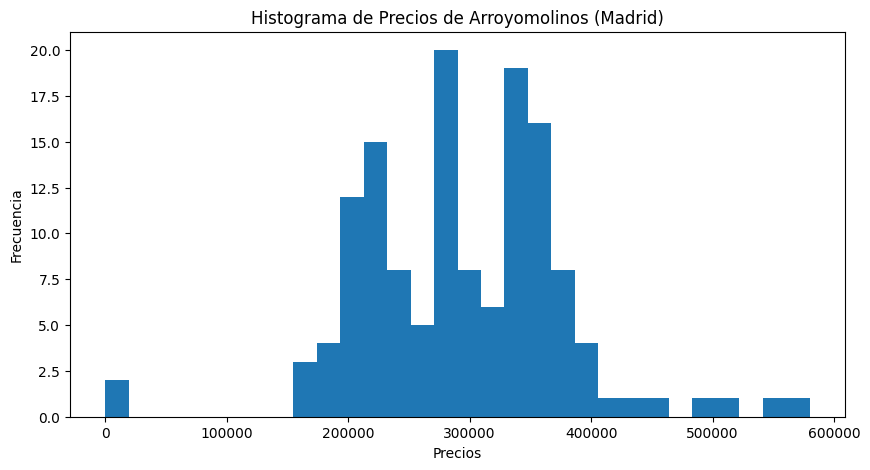

In [437]:

plt.figure(figsize = (10, 5))
plt.hist(dsfiltered["price"], bins = 30)
plt.title("Histograma de Precios de Arroyomolinos (Madrid)")
plt.xlabel("Precios")
plt.ylabel("Frecuencia")
plt.show()




Según el histograma de los precios de Arroyomolinos podemos observar que los precios se agrupan entre los 150.000€ y los 400.000€ siendo el precio más común cerca de los 300.000€.

#### Ejercicio 09. ¿Son los precios promedios de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios y escribe una conclusión sobre ellos.

In [438]:

dsValde=ds[ds["level5"]=="Valdemorillo"]
valdePrice=dsValde["price"].mean()

dsGala=ds[ds["level5"]=="Galapagar"]
galaPrice=dsGala["price"].mean()

print("Precio promedio de Valdemorillo:",valdePrice,"USD")
print("Precio promedio de Galapagar:",galaPrice,"USD")

if(valdePrice==galaPrice):
    print("Ambas poblaciones tiene el mismo promedio de precios")
elif(valdePrice>galaPrice):
    print("La poblacion Valdemorillo tiene un promedio de precios mayor que la poblacion Galapagar")
else:
    print("La poblacion Galapagar tiene un promedio de precios mayor que la poblacion Valdemorillo")


Precio promedio de Valdemorillo: 363860.2931034483 USD
Precio promedio de Galapagar: 360063.20238095237 USD
La poblacion Valdemorillo tiene un promedio de precios mayor que la poblacion Galapagar


#### Ejercicio 10. ¿Son los promedios de precio por metro cuadrado (precio/m2) de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios de precio por metro cuadrado y escribe una conclusión sobre ellos.

Pista: Crea una nueva columna llamada `pps` (*price per square* o precio por metro cuadrado) y luego analiza los valores.

In [439]:

ds["pps"]=ds["price"]/ds["surface"]

dsValde=ds[ds["level5"]=="Valdemorillo"]
valdePPS=dsValde["pps"].mean()

dsGala=ds[ds["level5"]=="Galapagar"]
galaPPS=dsGala["pps"].mean()

print("Promedio de precio por metro cuadrado de la poblacion Valdemorillo:",valdePPS)
print("Promedio de precio por metro cuadrado de la poblacion Galapagar:",galaPPS)

if(valdePPS==galaPPS):
    print("Ambas poblaciones tiene el mismo promedio de precio por metro cuadrado")
elif(valdePPS>galaPPS):
    print("Valdemorillo tiene un promedio de precio por metro cuadrado mayor que Galapagar")
else:
    print("Galapagar tiene un promedio de precio por metro cuadrado mayor que Valdemorillo")



Promedio de precio por metro cuadrado de la poblacion Valdemorillo: 1317.9502109024986
Promedio de precio por metro cuadrado de la poblacion Galapagar: 1606.3240303094024
Galapagar tiene un promedio de precio por metro cuadrado mayor que Valdemorillo


#### Ejercicio 11. Analiza la relación entre la superficie y el precio de las casas. (★★☆)

Pista: Puedes hacer un `scatter plot` y luego escribir una conclusión al respecto.

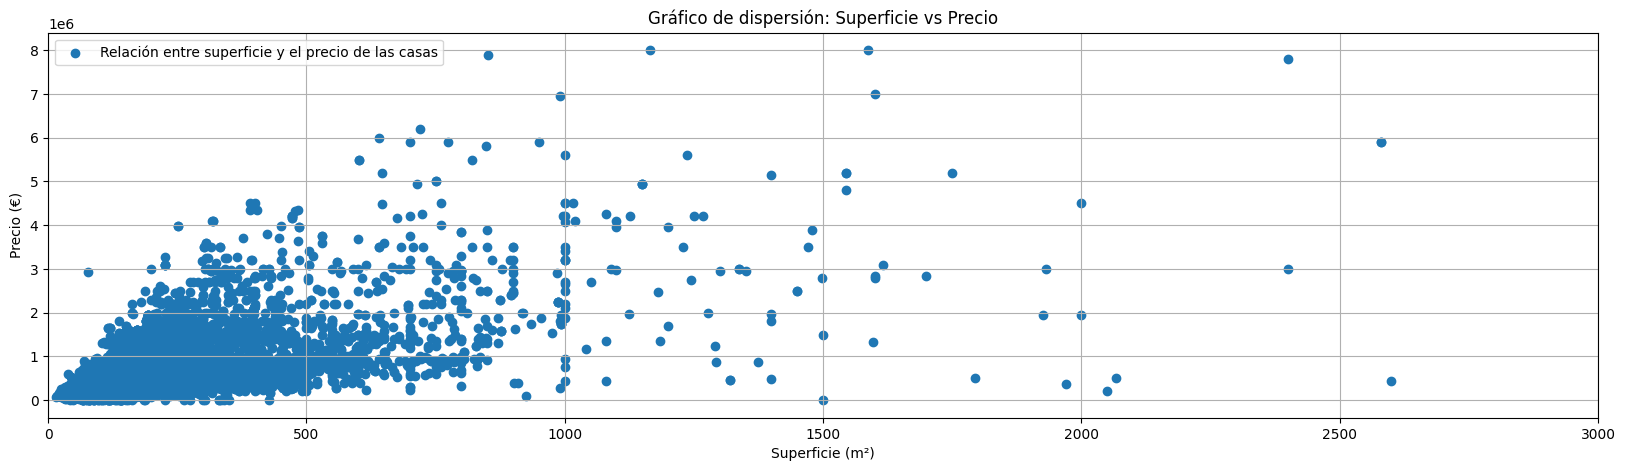

In [440]:

x=ds["surface"]
y=ds["price"]

plt.figure(figsize = (20, 5))
plt.scatter(x, y, label = "Relación entre superficie y el precio de las casas")
plt.title("Gráfico de dispersión: Superficie vs Precio")
plt.xlabel("Superficie (m²)")
plt.ylabel("Precio (€)")
plt.xlim(0,3000)
plt.legend()
plt.grid()
plt.show()

El diagrama de dispersión muestra la relación entre la superficie (en m²) y el precio (en euros) de las casas. Gracias al diagrama de dispersión, podemos observar que hay una gran presencia de casas con superficies pequeñas, las cuales varían significativamente en su precio. Además, hay propiedades que no siguen la tendencia de poseer poca superficie, sino que presentan una gran superficie, lo cual, como podemos ver, no afecta directamente su precio. La concentración de puntos en la esquina inferior izquierda del gráfico indica que la mayoría de las casas tienen superficies y precios más modestos.

#### Ejercicio 12. ¿Cuántas agencia de bienes raíces contiene el dataset? (★★☆)

Imprime el valor obtenido.

In [441]:

totalAgencies=ds['realEstate_name'].nunique()
"""totalAgencies=len(ds['realEstate_name'].unique())"""
print(totalAgencies)

1821


#### Ejercicio 13. ¿Cuál es la población (columna level5) que contiene la mayor cantidad de casas?(★★☆)

Imprima la población y el número de casas.

In [442]:

housesPP=ds["level5"].value_counts()
maxHousesPP=housesPP.idxmax()
totalhouses=housesPP.max()


print("La poblacion",maxHousesPP,"es la que más casa tiene con un total de",totalhouses,"casas")

La poblacion  Madrid Capital es la que más casa tiene con un total de 6643 casas


#### Ejercicio 14. Ahora vamos a trabajar con el "cinturón sur" de Madrid. Haz un subconjunto del DataFrame original que contenga las siguientes poblaciones (columna level5): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Pista: Filtra el DataFrame original usando la columna `level5` y la función `isin`.

In [443]:

cities=["Fuenlabrada","Leganés","Getafe","Alcorcón"]
dsfiltered=ds[ds["level5"].isin(cities)]

print(dsfiltered)

       Unnamed: 0  id_realEstates  isNew  \
1               2       153867863  False   
3               4       152776331  False   
85             86       153152077  False   
94             95       153995577  False   
109           110       153586414  False   
...           ...             ...    ...   
15275       15276       153903887  False   
15291       15292       151697757  False   
15305       15306       153902389  False   
15322       15323       153871864  False   
15325       15326       153901467  False   

                                 realEstate_name  phone_realEstate  \
1              tecnocasa fuenlabrada ferrocarril       916358736.0   
3              tecnocasa fuenlabrada ferrocarril       916358736.0   
85                       sinergical inmobiliaria               NaN   
94                               viviendas365com       911226014.0   
109              area uno asesores inmobiliarios       912664081.0   
...                                          ...   

#### Ejercicio 15. Traza un gráfico de barras de la mediana de los precios y explica lo que observas (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprima un gráfico de barras de la mediana de precios y escriba en la celda Markdown un breve análisis sobre el gráfico.

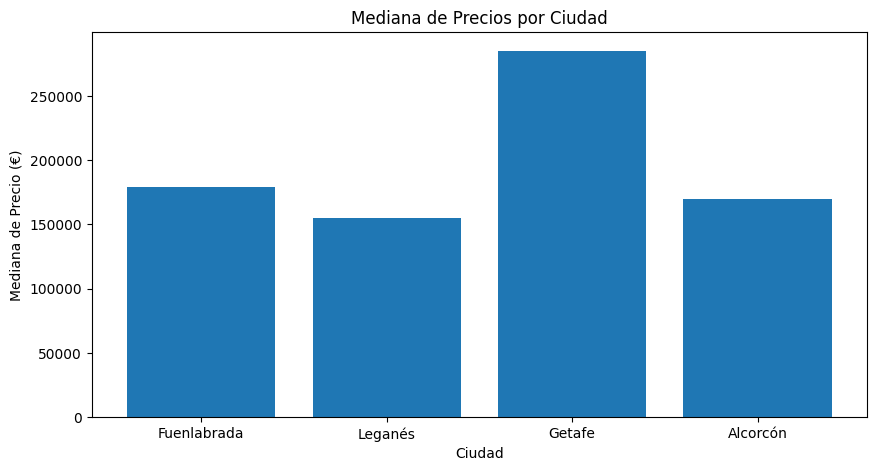

In [444]:


median=dsfiltered.groupby("level5")["price"].median()

plt.figure(figsize = (10, 5))
plt.bar(cities, median)
plt.title("Mediana de Precios por Ciudad")
plt.xlabel("Ciudad")
plt.ylabel("Mediana de Precio (€)")
plt.show()


Según el gráfico de barras que muestra las medianas de precios de las casas en Fuenlabrada, Leganés, Getafe y Alcorcón, se puede observar claramente que Getafe presenta la mediana de precio más alta entre estas ciudades. Esta diferencia es notable, convirtiendo a Getafe como la ciudad más cara de las cuatro. Por otro lado, Fuenlabrada, Alcorcón y Leganés muestran medianas de precios bastante similares, siendo Leganés la ciudad con la mediana de precio ligeramente más baja, lo que la convierte en la opción más accesible de las cuatro.

#### Ejercicio 16. Calcula la media y la varianza de muestra para las siguientes variables: precio, habitaciones, superficie y baños (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprime ambos valores por cada variable.

In [445]:


priceMean=dsfiltered.groupby("level5")["price"].mean()
priceVar=dsfiltered.groupby("level5")["price"].var()
roomMean=dsfiltered.groupby("level5")["rooms"].mean()
roomVar=dsfiltered.groupby("level5")["rooms"].var()
surfaceMean=dsfiltered.groupby("level5")["surface"].mean()
surfaceVar=dsfiltered.groupby("level5")["surface"].var()
bathroomsMean=dsfiltered.groupby("level5")["bathrooms"].mean()
bathroomsVar=dsfiltered.groupby("level5")["bathrooms"].var()

print(priceMean,priceVar,roomMean,roomVar,surfaceMean,surfaceVar,bathroomsMean,bathroomsVar)


level5
Alcorcón       230071.052632
Fuenlabrada    177198.021459
Getafe         265040.500000
Leganés        208682.010309
Name: price, dtype: float64 level5
Alcorcón       1.594783e+10
Fuenlabrada    4.701021e+09
Getafe         2.098267e+10
Leganés        1.191394e+10
Name: price, dtype: float64 level5
Alcorcón       2.914894
Fuenlabrada    3.025974
Getafe         3.151724
Leganés        2.906736
Name: rooms, dtype: float64 level5
Alcorcón       0.933895
Fuenlabrada    0.355844
Getafe         0.772748
Leganés        0.824590
Name: rooms, dtype: float64 level5
Alcorcón       105.913295
Fuenlabrada    103.624365
Getafe         126.896266
Leganés        105.852273
Name: surface, dtype: float64 level5
Alcorcón       4244.323834
Fuenlabrada    2264.643893
Getafe         5828.110028
Leganés        3987.475195
Name: surface, dtype: float64 level5
Alcorcón       1.623656
Fuenlabrada    1.445415
Getafe         1.865052
Leganés        1.518135
Name: bathrooms, dtype: float64 level5
Alcorcón    

#### Ejercicio 17. ¿Cuál es la casa más cara de cada población? Debes usar el subset obtenido en la pregunta 14 (★★☆)

Imprime tanto la dirección como el precio de la casa seleccionada de cada población. Puedes imprimir un DataFrame o una sola línea para cada población.

In [446]:

maxPrices=dsfiltered.groupby("level5")["price"].idxmax()
maxPriceHouse=dsfiltered.loc[maxPrices,["level5", "address", "price"]]

print(maxPriceHouse)

            level5                                address    price
5585      Alcorcón                               Alcorcón   950000
11561  Fuenlabrada  Calle de Paulo Freire, 5, Fuenlabrada   490000
2881        Getafe                                 Getafe  1050000
10412      Leganés           Avenida Reina Sofía, Leganés   650000


#### Ejercicio 18. Normaliza la variable de precios para cada población y traza los 4 histogramas en el mismo gráfico (debes usar el subconjunto obtenido en la pregunta 14) (★★★)

Para el método de normalización, puedes usar el que consideres adecuado, no hay una única respuesta correcta para esta pregunta. Imprime el gráfico y escribe en la celda de Markdown un breve análisis sobre el gráfico.

Pista: Puedes ayudarte revisando la demostración multihist de Matplotlib.

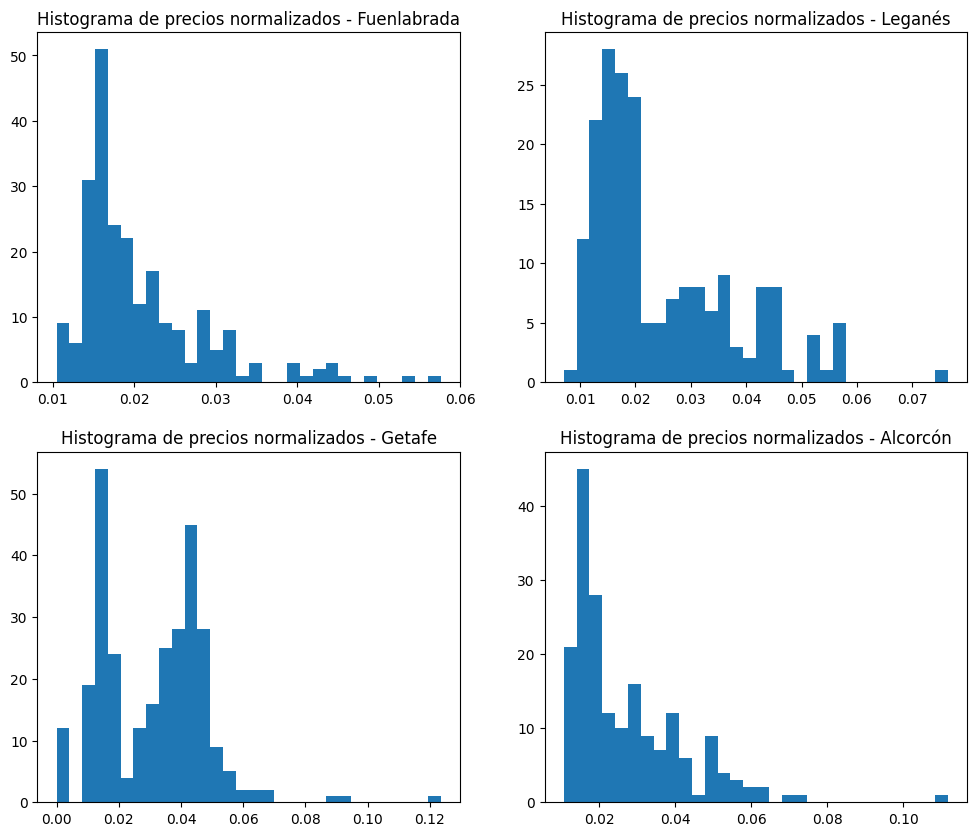

In [447]:

scaler=MinMaxScaler()
ds["normalPrices"] = scaler.fit_transform(ds[['price']])

cities=["Fuenlabrada","Leganés","Getafe","Alcorcón"]
dsfiltered=ds[ds["level5"].isin(cities)]

fig,axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
for city, ax in zip(cities, axs.flatten()):
    subset = dsfiltered[dsfiltered["level5"] == city]
    ax.hist(subset["normalPrices"], bins=30)
    ax.set_title("Histograma de precios normalizados - "+ city)


Gracias al histograma, se observa que en Fuenlabrada y Leganés, la mayor concentración de precios normalizados se encuentra entre 0.01 y 0.02, con algunos valores dispersos hasta aproximadamente 0.06 y 0.07 respectivamente. Getafe muestra picos notables alrededor de 0.01-0.02 y 0.04, con precios dispersos hasta 0.12, menos frecuentes en valores altos. Alcorcón presenta un pico marcado cerca de 0.02, con precios dispersos que alcanzan cerca de 0.10.

#### Ejercicio 19. ¿Qué puedes decir sobre el precio por metro cuadrado (precio/m2) entre los municipios de 'Getafe' y 'Alcorcón'? Debes usar el subconjunto obtenido en la pregunta 14 (★★☆)

Pista: Crea una nueva columna llamada `pps` (price per square en inglés) y luego analiza los valores

In [448]:

dsGeta=dsfiltered[dsfiltered["level5"]=="Getafe"]
getaPPS=dsGeta["pps"].mean()

dsAlco=dsfiltered[dsfiltered["level5"]=="Alcorcón"]
alcoPPS=dsAlco["pps"].mean()

print("Promedio de precio por metro cuadrado de Getafe:",getaPPS)
print("Promedio de precio por metro cuadrado de Alcorcón:",alcoPPS)

if(getaPPS==alcoPPS):
    print("Ambas poblaciones tiene el mismo promedio de precio por metro cuadrado")
elif(getaPPS>alcoPPS):
    print("Getafé tiene un promedio de precio por metro cuadrado mayor que Alcorcón")
else:
    print("Alcorcón tiene un promedio de precio por metro cuadrado mayor que Getafe")

Promedio de precio por metro cuadrado de Getafe: 2066.314949251463
Promedio de precio por metro cuadrado de Alcorcón: 2239.302480199618
Alcorcón tiene un promedio de precio por metro cuadrado mayor que Getafe


#### Ejercicio 20. Realiza el mismo gráfico para 4 poblaciones diferentes (columna level5) y colócalos en el mismo gráfico. Debes usar el subconjunto obtenido en la pregunta 14 (★★☆) 
Pista: Haz un diagrama de dispersión de cada población usando subgráficos (subplots).

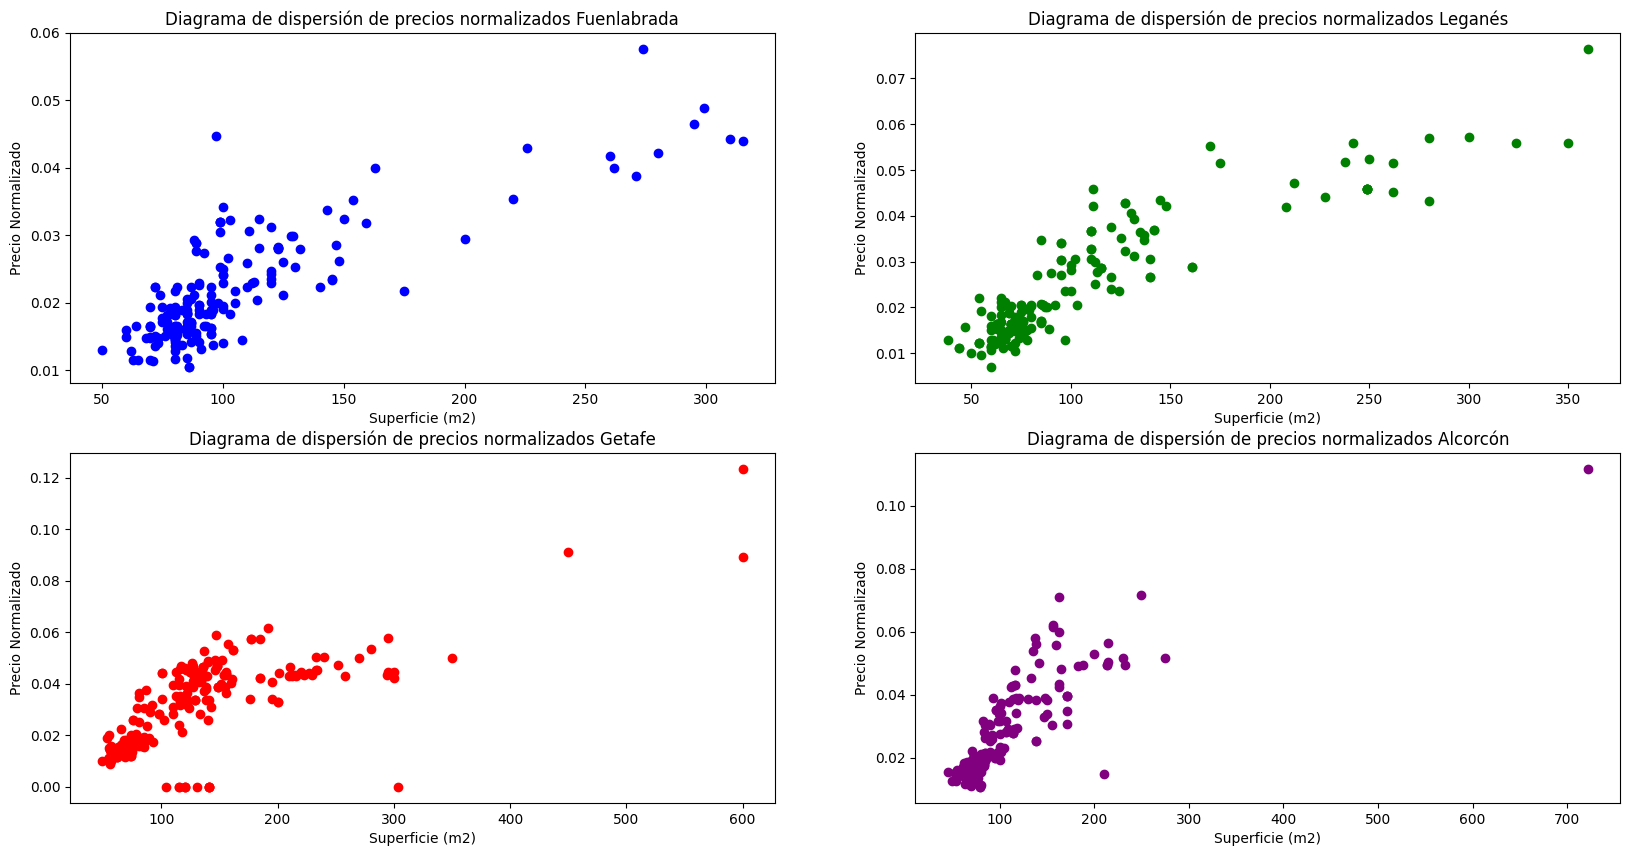

In [449]:


colors=['blue', 'green', 'red', 'purple']
fig,axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

for city, ax, color in zip(cities, axs.flatten(),colors):
    subset = dsfiltered[dsfiltered["level5"]==city]
    ax.scatter(subset["surface"], subset["normalPrices"],color=color)
    ax.set_title("Diagrama de dispersión de precios normalizados "+city)
    ax.set_xlabel("Superficie (m2)")
    ax.set_ylabel("Precio Normalizado")


#### Ejercicio 21. Realiza un trazado de las coordenadas (columnas latitud y longitud) del cinturón sur de Madrid por color de cada población (debes usar el subconjunto obtenido del Ejercicio 14) (★★★★)

Ejecuta la siguiente celda y luego comienza a codear en la siguiente. Debes implementar un código simple que transforme las columnas de coordenadas en un diccionario de Python (agrega más información si es necesario) y agrégala al mapa.

In [450]:
from ipyleaflet import Map, basemaps,Marker

# Mapa centrado en (60 grados latitud y -2.2 grados longitud)
# Latitud, longitud
map = Map(center = (40, -3), zoom = 8, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.OpenStreetMap.Mapnik)
map

Map(center=[40, -3], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…

In [451]:
import pandas as pd

ds=pd.read_csv('assets/real_estate.csv', sep=';')
cities=["Fuenlabrada","Leganés","Getafe","Alcorcón"]
dsfiltered=ds[ds["level5"].isin(cities)]
colors=['blue', 'green', 'red', 'purple']

coordinates={}
markers=[]

for index,row in dsfiltered.iterrows():
    city = row["level5"]
    lat = str(row["latitude"]).replace(',', '.')
    lon = str(row["longitude"]).replace(',', '.')
    if city not in coordinates: 
        coordinates[city] = []
    
    coordinates[city].append((lat, lon))


for city, coords_list in coordinates.items():
    for coords in coords_list:
        lat, lon = coords
        marker = Marker(location=(lat, lon))
        map.add(marker)
       
print(coordinates)




{'Fuenlabrada': [('40.28674', '-3.79351'), ('40.2853785786438', '-3.79508142135624'), ('40.2744807718156', '-3.79192471504211'), ('40.2906814213562', '-3.80405242135624'), ('40.3152529585', '-3.8365174323'), ('40.2921796', '-3.815865'), ('40.29224', '-3.83833'), ('40.31381', '-3.83733'), ('40.29742', '-3.80916'), ('40.3133562', '-3.8360052'), ('40.27782', '-3.80908'), ('40.2919082135624', '-3.82411851356237'), ('40.31381', '-3.83733'), ('40.2889244', '-3.7985458'), ('40.2837261', '-3.7907629'), ('40.2823585', '-3.8061052'), ('40.2830905213562', '-3.80549367864376'), ('40.296075', '-3.80790299999994'), ('40.2772542', '-3.7907283'), ('40.296075', '-3.80790299999994'), ('40.2772542', '-3.7907283'), ('40.2915427786438', '-3.79755132135624'), ('40.28293', '-3.80959'), ('40.29338', '-3.82598'), ('40.2871968', '-3.7917573'), ('40.2890264864376', '-3.81057698643763'), ('40.2833037', '-3.78627316'), ('40.288330005557', '-3.7994911074191'), ('40.288095391725', '-3.8000407415556'), ('40.28651', '